In [8]:
from data import CrowdDataSet 
import matplotlib.pyplot as plt
import numpy as np
from data import CrowdDataSet 
from data import default_train_transforms, default_val_transforms, default_exploration_transform
from torchvision import transforms
from PIL import Image
from utils import get_density_map_gaussian

loaders = {
    "train": CrowdDataSet(
        'part_A/train_data', default_train_transforms()
    ),
    "train_exp": CrowdDataSet(
        'part_A/train_data', default_exploration_transform()
    ),
    "val": CrowdDataSet(
        'part_A/test_data', default_val_transforms()
    ),
    "test": CrowdDataSet(
        'part_B/test_data', default_val_transforms()
    )
}

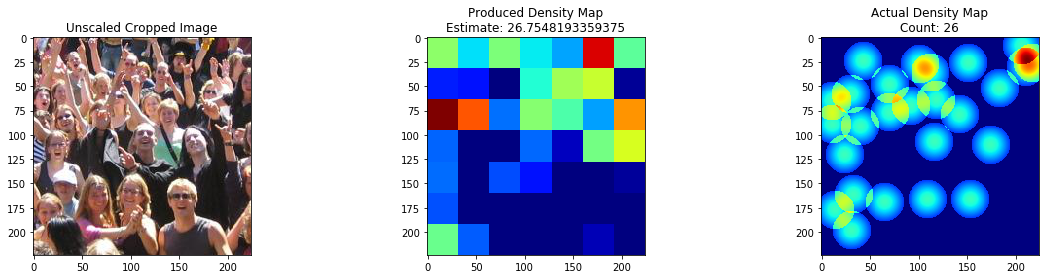

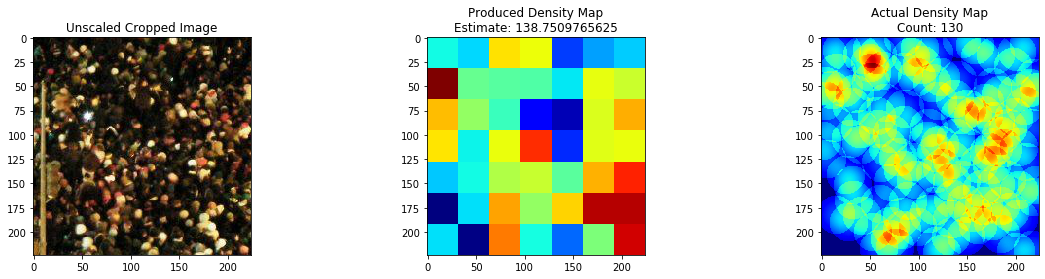

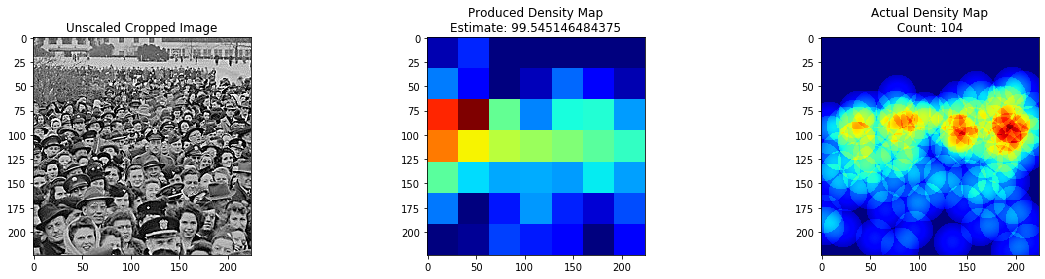

In [15]:
import torch

model = torch.load('saved_models/vgg16_density_map')
model.eval()

for i in [3, 50, 78]:
    fg, (p1, p2, p3) = plt.subplots(1, 3, figsize=(20, 4))

    x = loaders['train_exp'][i]
    p1.imshow(transforms.ToPILImage()(x['image']).convert('RGB'))
    p1.set_title("Unscaled Cropped Image")

    dt = loaders['train'][i]
    image = dt['image'].to()
    gt = dt['gt']

    predictions = model(image[None, ...].float())
    predictions = predictions.squeeze().data.cpu().numpy() 
    p2.imshow(predictions, cmap=plt.cm.jet)
    p2.set_title("Produced Density Map\nEstimate: {}".format(np.sum(predictions)/100))
    
    k = np.zeros((transformed_img.width, transformed_img.height))
    k = get_density_map_gaussian(k, gt, adaptive_mode=False)
    p3.imshow(k, cmap=plt.cm.jet)
    p3.set_title('Actual Density Map\nCount: {}'.format(len(gt)))